In [1]:
# Import all the necessary libraries.
import numpy as np
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

## Generate target function and its noisy version

In [2]:
# Sets the number of examples.
M = 100

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

# Create "Target Function" to generate Test Functions
def target_function(M, x):
    y = 2 + x + 0.5*x**2 + x**3
    return y

# Create target training function and its noisy version.
x = 6*np.random.rand(M, 1) - 3
y = target_function(M, x)

# Noisy Vertion of Objective Function
y_noisy = y + np.random.randn(M, 1)

# Create target test function and its noisy version.
Mtest = 100
x_test = np.linspace(-3, 3, Mtest).reshape(Mtest, 1)
y_test = target_function(Mtest, x_test) + np.random.randn(Mtest, 1)


## Plot original data versus noisy version.

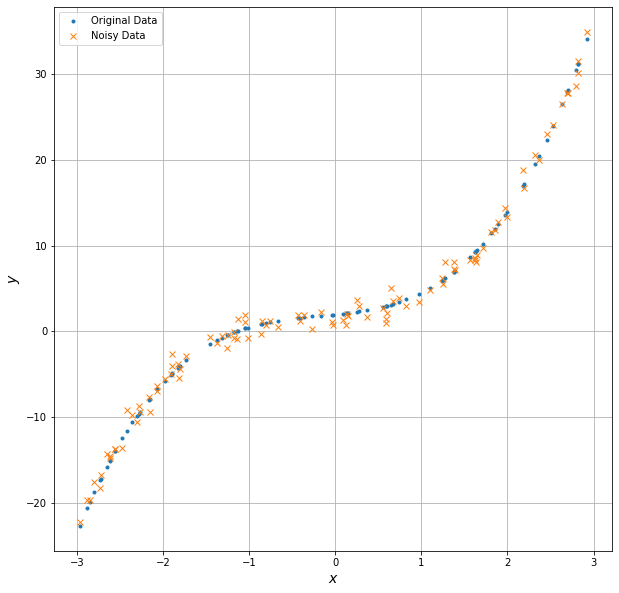

In [3]:
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, '.', label='Original Data')
plt.plot(x, y_noisy, 'x', label='Noisy Data')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

## Define the polinomial order

In [4]:
# Define the order of the hyphothesis polinomial.
model_order = 30

In [5]:
include_bias = True

# Manual learning rate.
alpha = 0.04

# Maximum number of iterations.
n_epochs = 1000

def mse(X, a, y, M):
    Jgrad = (1/M)*sum(np.power((y - X.dot(a)), 2))
    return Jgrad

def bgd(X_train, y_train, X_val, y_val, X_test, y_test, model_order, alpha, n_epochs, a_init):
    
    minimum_val_error = float("inf")
    best_epoch = None
    best_model = None
    norm_hist = np.zeros(n_epochs+1)
    
    # Random initialization of parameters.
    a = a_init

    # Create array for storing error values.
    Jgrad_train = np.zeros(n_epochs+1)
    Jgrad_val   = np.zeros(n_epochs+1)
    Jgrad_test  = np.zeros(n_epochs+1)

    Jgrad_train[0] = mse(X_train, a, y_train, len(y_train))
    Jgrad_val[0]   = mse(X_val, a, y_val, len(y_val))
    Jgrad_test[0]  = mse(X_test, a, y_test, len(y_test))
    
    norm_hist[0] = np.linalg.norm(a)
    
    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    # While iteration < n_epochs and error > 0.001:
    while iteration < n_epochs:
        gradients = -2/len(y_train)*X_train.T.dot(y_train - X_train.dot(a))
        a = a - alpha * gradients
        Jgrad_train[iteration+1] = mse(X_train, a, y_train, len(y_train))
        error = np.abs(Jgrad_train[iteration+1] - Jgrad_train[iteration])
        Jgrad_val[iteration+1] = mse(X_val, a, y_val, len(y_val))
        Jgrad_test[iteration+1] = mse(X_test, a, y_test, len(y_test))
        norm_hist[iteration+1] = np.linalg.norm(a[1:])
        if Jgrad_val[iteration+1] < minimum_val_error:
            minimum_val_error = Jgrad_val[iteration+1]
            best_epoch = iteration
            best_model = a
        
        iteration = iteration + 1
        
    return Jgrad_train, Jgrad_val, Jgrad_test, minimum_val_error, best_epoch, best_model, norm_hist, a
    

In [6]:
# Split the whole set into random training and validation set
# 70% training set
# 30% validation set
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.7, random_state=42)

In [7]:
# Concatenate both column vectors for training set.
X_train = np.ones((len(y_train),1))
for i in range(1, model_order+1):
    X_train = np.c_[X_train, np.power(x_train, i)]

# Run feature-scaling.
scaler = StandardScaler()
X_train = np.c_[np.ones((len(y_train),1)), scaler.fit_transform(X_train[:,1:])]

# Concatenate both column vectors for validation set.
X_val = np.ones((len(y_val),1))
for i in range(1, model_order+1):
    X_val = np.c_[X_val, np.power(x_val, i)]

# Run feature-scaling.
X_val = np.c_[np.ones((len(y_val),1)), scaler.transform(X_val[:,1:])]

# Concatenate both column vectors for test set.
X_test = np.ones((len(y_test),1))
for i in range(1, model_order+1):
    X_test = np.c_[X_test, np.power(x_test, i)]

# Run feature-scaling.
X_test = np.c_[np.ones((len(y_test),1)), scaler.transform(X_test[:,1:])]

# Initialize weights.
a_init = np.random.randn(model_order+1, 1)
if(0):
    a_init = np.zeros((model_order+1, 1))
    a_init[0] = 2
    a_init[1] = 1
    a_init[2] = 0.5
    a_init[3] = 1

# Run batch gradient descent.
J_grad_train, J_grad_val, J_grad_test, minimum_val_error, best_epoch, best_model, norm_hist, a = bgd(X_train, y_train, X_val, y_val, X_test, y_test, model_order, alpha, n_epochs, a_init)
a_opt = [1, 0.5, 1]


In [8]:
# Print coefs
print('best_epoch:',best_epoch)
print('minimum_val_error:',minimum_val_error)
print('norma:', np.linalg.norm(best_model[1:])/30)
print('norma:', np.linalg.norm(a_opt)/3)

best_epoch: 660
minimum_val_error: 1.935326853492365
norma: 0.24964094286241778
norma: 0.5


## Plot Training and Validation error vs. Epoch

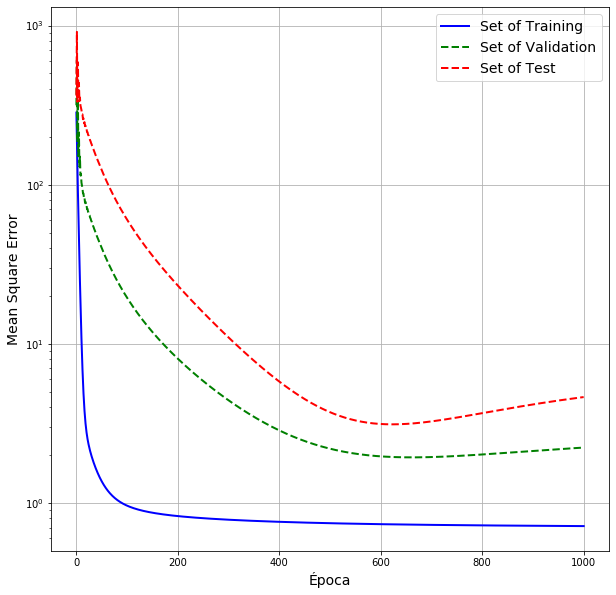

In [9]:
fig = plt.figure(figsize=(10,10))

plt.plot(range(0, n_epochs+1), J_grad_train, "b-", linewidth=2, label="Set of Training")
plt.plot(range(0, n_epochs+1), J_grad_val, "g--", linewidth=2, label="Set of Validation")
plt.plot(range(0, n_epochs+1), J_grad_test, "r--", linewidth=2, label="Set of Test")
plt.yscale('log')
plt.legend(loc="upper right", fontsize=14)
plt.xlabel('Época', fontsize=14)
plt.ylabel("Mean Square Error", fontsize=14)
plt.grid()
plt.show()

## Plot Hypothesis Function.

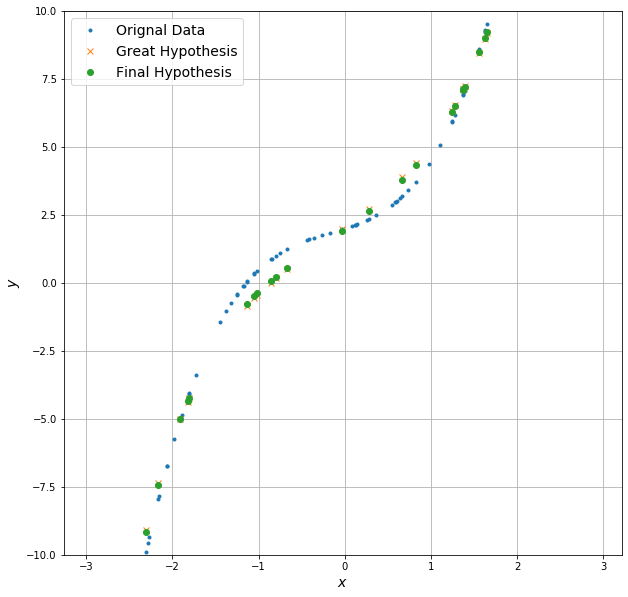

In [10]:
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, '.', label='Orignal Data')
plt.plot(x_train, X_train.dot(best_model), 'x', label='Great Hypothesis')
plt.plot(x_train, X_train.dot(a), 'o', label='Final Hypothesis')
plt.ylim([-10, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()